In [1]:
import pygame
import pygame.display

import pytmx

from matplotlib import pyplot as plt
from PIL import Image

import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
os.environ["SDL_AUDIODRIVER"] = "dummy"

from pprint import pprint

pygame.init()
import pygame.display
pygame.display.init()

pprint(pygame.display.list_modes())

gameMode = pygame.display.list_modes()[0]
gameScreen = pygame.display.set_mode(gameMode)

pprint((gameScreen.get_width(), gameScreen.get_height()))

pygame 2.1.2 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
[(1024, 768)]
(1024, 768)


In [2]:
gameMap = pytmx.load_pygame('tmx-tests/rainbow_map.tmx')

In [3]:
for layer in gameMap.visible_layers:
    pprint(layer)
    if type(layer) == pytmx.pytmx.TiledGroupLayer:
        pprint(layer)
    elif type(layer) == pytmx.pytmx.TiledTileLayer:
        for x, y, gid, in layer:
            tile = gameMap.get_tile_image_by_gid(gid)
            if tile is not None:
                #pprint(tile)
                gameScreen.blit(tile, (x * gameMap.tilewidth, y * gameMap.tileheight))
    else:
        pprint(layer)

pygame.display.update()

<TiledGroupLayer[117]: "Nivel 00">
<TiledGroupLayer[117]: "Nivel 00">
<TiledGroupLayer[121]: "Nivel 01">
<TiledGroupLayer[121]: "Nivel 01">
<TiledGroupLayer[128]: "Nivel 02">
<TiledGroupLayer[128]: "Nivel 02">
<TiledTileLayer[118]: "Suelo 00">
<TiledTileLayer[119]: "Objetos 00 A">
<TiledTileLayer[131]: "Objetos 00 B">
<TiledTileLayer[122]: "Suelo01">
<TiledTileLayer[123]: "Objetos 01 A">
<TiledTileLayer[129]: "Suelo02">
<TiledTileLayer[130]: "Objetos 02 A">


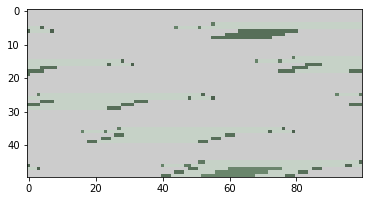

In [4]:
rgba_data = pygame.image.tostring(gameScreen, 'RGBA')
pil_img = Image.frombytes('RGBA', (100, 50), rgba_data)

#from io import BytesIO
#png_data = BytesIO()
#pil_img.save(png_data, 'PNG')
#print(png_data.getvalue())

plt.imshow(pil_img)
plt.show()
